# KAN Symbolic Regression Example

This notebook demonstrates the use of KAN (Kolmogorov-Arnold Networks) for symbolic regression using the `kan_sr` module.

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from openai import OpenAI
import os
import sys
import sympy
from sympy import symbols

# Add the parent directory to the path to import LLMSR
sys.path.append('..')
from LLMSR import kan_sr
from kan import KAN
import LLMSR.llm

## Set up OpenAI client

You need to have an OpenAI API key for this example to work.

In [3]:
client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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", 
)
LLMSR.llm.check_key_limit(client)


# Custom system prompt for the LLM
system_prompt_for_second_simplification = None # if we set it to None or 'default', the default one in the kan_sr.py will be used

2025-03-11 22:30:05,613 - LLMSR.llm - INFO - API key check successful. Remaining limit: None


## Example 1: Simple Polynomial Function

We'll start with a simple example to demonstrate the basic workflow.

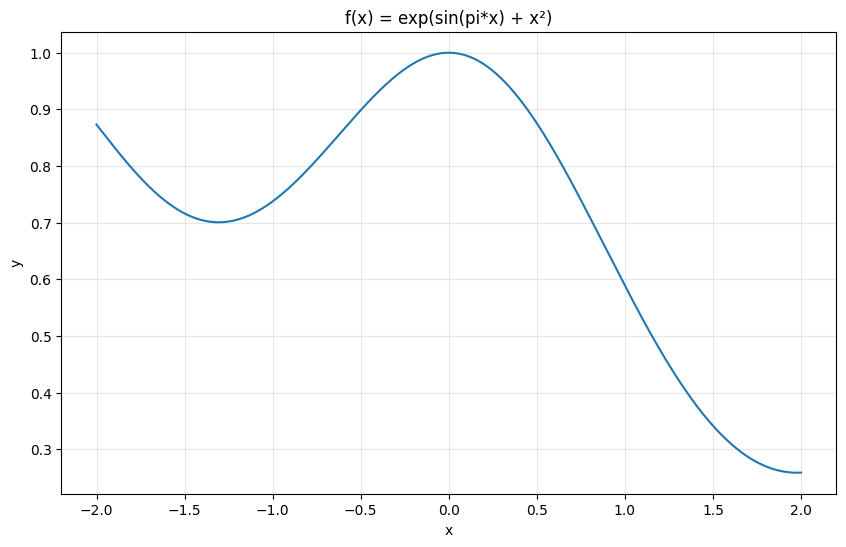

In [41]:
# Define the function as a PyTorch function
def f(x):
    return torch.cos(torch.sin(pi*x) + x**2/10)
# Plot the function
x_range = (-2,2)
x = np.linspace(x_range[0], x_range[1], 1000)
y = f(torch.tensor(x))

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"f(x) = exp(sin(pi*x) + x²)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

## Train a KAN model and convert it to symbolic expressions

Now we'll use our `kan_sr` module to train a KAN model and extract symbolic expressions.

cpu
checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                          | 0/100 [00:00<?, ?it/s]

| train_loss: 8.71e-05 | test_loss: 8.61e-05 | reg: 9.05e+00 | : 100%|█| 100/100 [00:36<00:00,  2.74


saving model version 0.1
saving model version 0.2
Final training loss: 8.713168790563941e-05


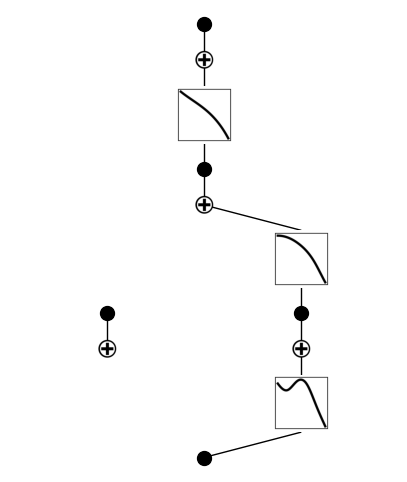

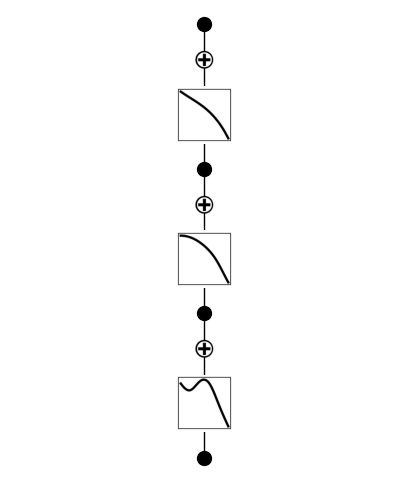

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Set up KAN model parameters
width = [1,2,1, 1]  # Network architecture
grid = 5     # Grid size
k = 3              # Number of basis functions
train_steps = 100  # Number of training steps
seed = 1


# Create a KAN model
model = KAN(width=width, grid=grid, k=k, seed=seed, device=  device , symbolic_enabled=False, noise_scale=0.1)



# Create a dataset
dataset = kan_sr.create_dataset(f, n_var=1, ranges=x_range, train_num=10000, test_num=1000, device="cpu")
res = model.fit(dataset, opt='LBFGS', steps=train_steps, lamb=0.001, lamb_entropy=1.);


pruned_model = model.prune(node_th=0.2, edge_th=0.2)
train_loss = res['train_loss']
model.plot()
pruned_model.plot()

print(f"Final training loss: {train_loss[-1]}")

2025-03-12 00:49:11,108 - LLMSR.llm - INFO - API key usage check successful. Current usage: 35.137744246
2025-03-12 00:49:11,109 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-12 00:49:11,111 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


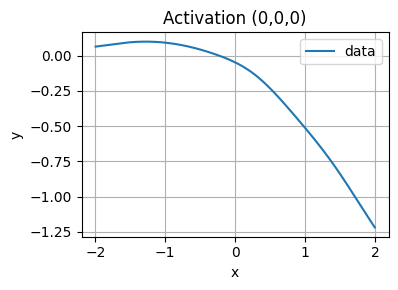

2025-03-12 00:49:11,204 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-12 00:49:11,205 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 2.7016485111698083, for constant: [-0.23820766]
2025-03-12 00:49:11,205 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-12 00:49:14,100 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-12 00:49:14,101 - LLMSR.llmSR - INFO - Initial population best: score=-0.06541619767112901, params=[-4.35734832e+02  7.14193006e-04 -1.34302098e-01 -6.48543356e-02], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3]...


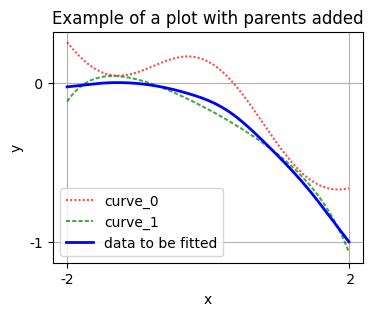

2025-03-12 00:49:14,158 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-12 00:49:17,253 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.06540972896508493, params=[-4.91313043e+02  6.33403722e-04 -1.34302097e-01 -6.48543367e-02], ansatz: params[0] * np.tanh(params[1] * x) + params[2] * x**2 + params[3]...
2025-03-12 00:49:17,254 - LLMSR.llmSR - INFO - Generation 2/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-12 00:49:21,293 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.021040509928737378, params=[ 0.6368025   0.45085162 -0.203544   -0.69937836], ansatz: params[0] * np.exp(-params[1] * x) + params[2] * x**2 + params[3]...
2025-03-12 00:49:21,294 - LLMSR.llmSR - INFO - Genetic algorithm completed after 3 generations
2025-03-12 00:49:21,294 - LLMSR.llmSR - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 30 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
No errors
Approximation for (0,0,0): params[0] * np.exp(-params[1] * x) + params[2] * x**2 + params[3], with parameters [ 0.637  0.451 -0.204 -0.699]


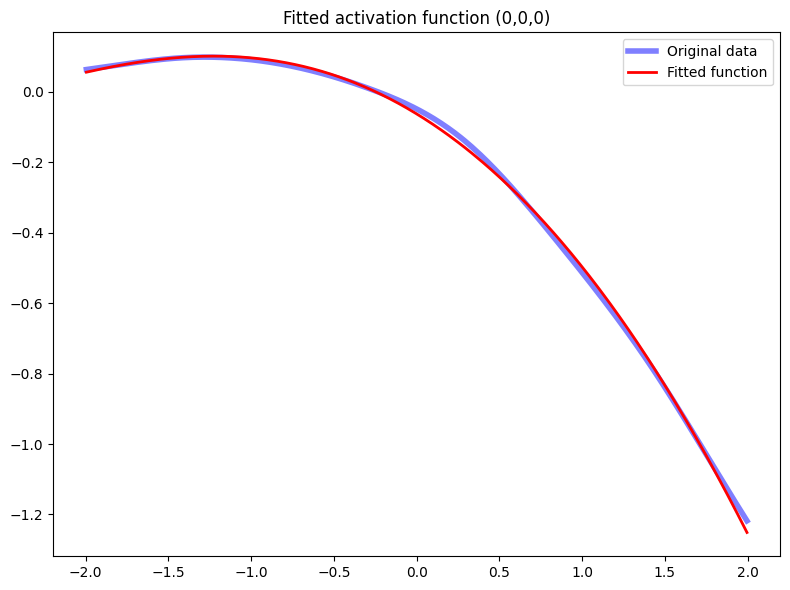

2025-03-12 00:49:21,361 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


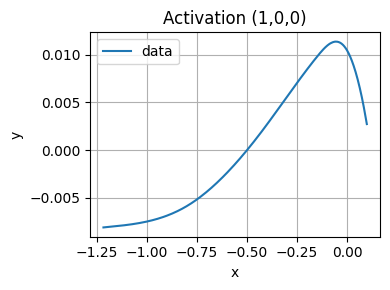

2025-03-12 00:49:21,425 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-12 00:49:21,426 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 2.9581146272230154, for constant: [0.00326272]
2025-03-12 00:49:21,426 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-12 00:49:31,800 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-12 00:49:31,801 - LLMSR.llmSR - INFO - Initial population best: score=-0.1181818816816883, params=[-0.05999185 -0.1000222  -0.02317419  0.0078233 ], ansatz: params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]...


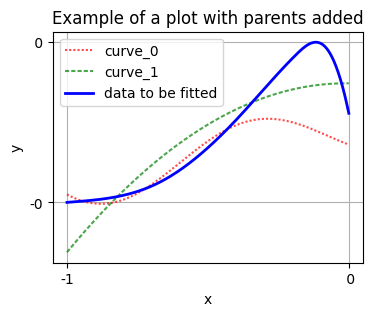

2025-03-12 00:49:31,845 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-12 00:49:35,065 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.019448124243718504, params=[-0.08825686 -2.40030422 -0.20281199 -0.24680967  0.00915696], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...
2025-03-12 00:49:35,066 - LLMSR.llmSR - INFO - Generation 2/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-12 00:49:43,021 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.0006681225841668152, params=[-1.04480588e-02  8.53334714e+00  6.88235999e-03  3.66892026e-02
  5.80623544e-02  2.07550553e-02], ansatz: params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5]...
2025-03-12 00:49:43,022 - LLMSR.llmSR - INFO - Exit condition met after generation 2: -0.0006681225841668152>-0.01276004035025835
2025-03-12 00:49:43,022 - LLMSR.llmSR - INFO - Successf


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 30 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
No errors
Approximation for (1,0,0): params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5], with parameters [-1.000e-02  8.533e+00  7.000e-03  3.700e-02  5.800e-02  2.100e-02]


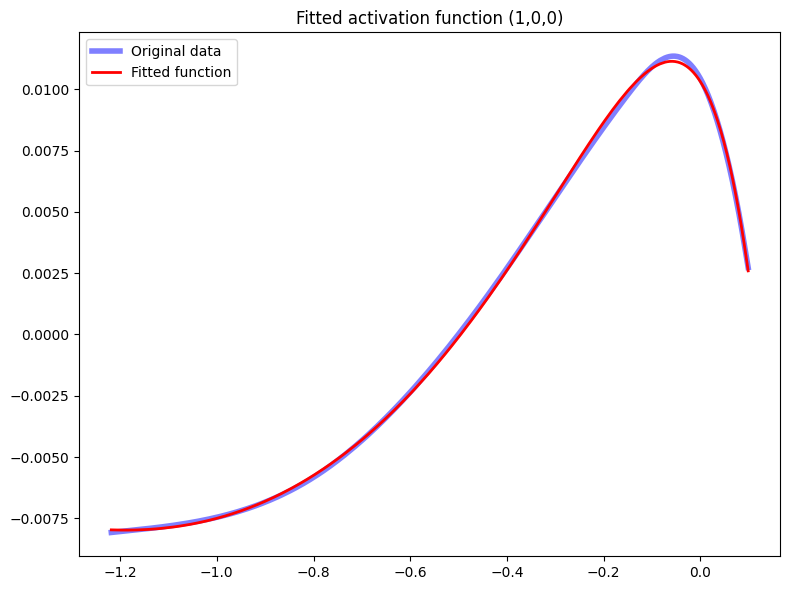

2025-03-12 00:49:43,099 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (2,0,0)


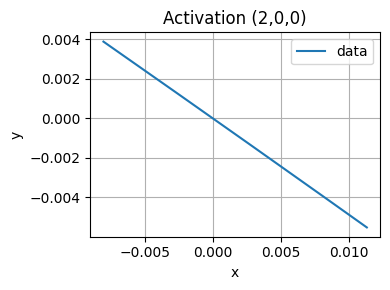

2025-03-12 00:49:43,166 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (2,0,0)
2025-03-12 00:49:43,166 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 2.2932624515057585, for constant: [-0.00158867]
2025-03-12 00:49:43,167 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-12 00:49:47,625 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-12 00:49:47,626 - LLMSR.llmSR - INFO - Initial population best: score=-9.976731571227063e-06, params=[-4.84341898e-01 -8.39959610e-06], ansatz: params[0] * x + params[1]...
2025-03-12 00:49:47,626 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-12 00:49:47,626 - LLMSR.llmSR - INFO - Successfully found expression for connection (2,0,0)


Approximation for (2,0,0): params[0] * x + params[1], with parameters [-0.484 -0.   ]


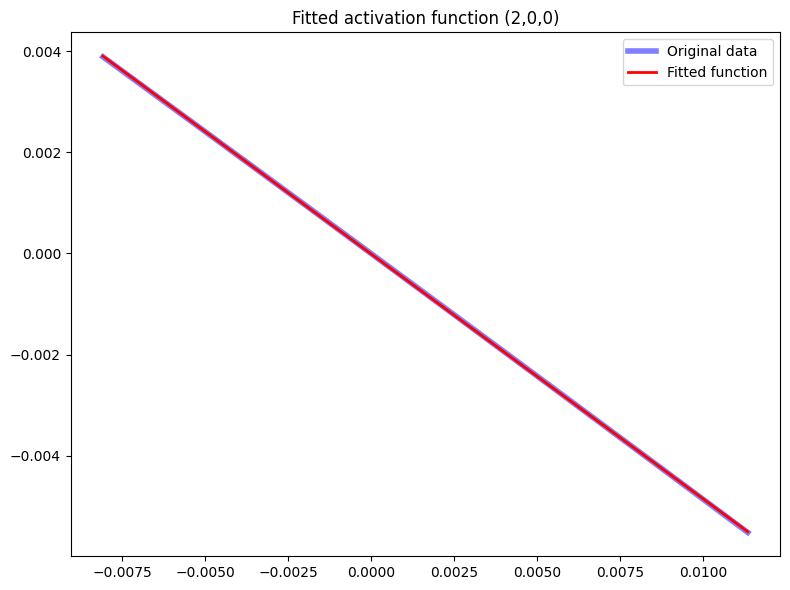

2025-03-12 00:49:47,699 - LLMSR.llmSR - INFO - KAN conversion complete: 3 total connections
2025-03-12 00:49:47,699 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 3 processed
2025-03-12 00:49:48,552 - LLMSR.llm - INFO - API key usage check successful. Current usage: 35.246584246
2025-03-12 00:49:48,555 - LLMSR.llmSR - INFO - API key usage whilst this was running: $0.11


Approximation for (0, 0, 0): params[0] * np.exp(-params[1] * x) + params[2] * x**2 + params[3]
Parameters are [ 0.6  0.5 -0.2 -0.7]
Approximation for (1, 0, 0): params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5]
Parameters are [-0.   8.5  0.   0.   0.1  0. ]
Approximation for (2, 0, 0): params[0] * x + params[1]
Parameters are [-0.5 -0. ]


In [89]:
res = LLMSR.kan_to_symbolic(pruned_model, client, gpt_model="openai/gpt-4o", exit_condition=min(train_loss).item(), generations=3, population=10, demonstrate_parent_plotting=True, plot_parents=True)
#sort by score
symb_expr_sorted = kan_sr.sort_symb_expr(res)



## Extract symbolic expressions from the trained KAN model

Now that we have a trained model, and have fitted each activation function, we can extract symbolic expressions from it. We then feed it to an LLM to simplify it.

In [90]:
from importlib import reload
reload(LLMSR.fit)
reload(LLMSR.kan_sr)

<module 'LLMSR.kan_sr' from '/Users/kit/Documents/Phys_Working/LLM_SR/Examples/../LLMSR/kan_sr.py'>

In [91]:
# build expression tree
node_data = LLMSR.kan_sr.build_expression_tree(pruned_model, symb_expr_sorted, top_k=3)
print(node_data['full_expressions'])

KAN Connection: (0, 0, 0), Best Expression: 0.6368 * np.exp(-0.4509 * x ) + -0.2035 * x**2 + -0.6994, Score: -0.02104
KAN Connection: (1, 0, 0), Best Expression: -0.0104 * np.exp(8.5333 * x ) + 0.0069 * x**3 + 0.0367 * x**2 + 0.0581 * x + 0.0208, Score: -0.00067
KAN Connection: (2, 0, 0), Best Expression: -0.4843 * x + -0.0000, Score: -0.00001
simplifying -0.4843 * (-0.0104 * sp.exp(8.5333 * (0.6368 * sp.exp(-0.4509 * x0 ) - 0.2035 * x0**2 - 0.6994) ) + 0.0069 * (0.6368 * sp.exp(-0.4509 * x0 ) - 0.2035 * x0**2 - 0.6994)**3 + 0.0367 * (0.6368 * sp.exp(-0.4509 * x0 ) - 0.2035 * x0**2 - 0.6994)**2 + 0.0581 * (0.6368 * sp.exp(-0.4509 * x0 ) - 0.2035 * x0**2 - 0.6994) + 0.0208) - 0.0000 with {'x0': x0, 'exp': exp, 'sp': <module 'sympy' from '/Users/kit/Documents/Phys_Working/LLM_SR/.venv/lib/python3.10/site-packages/sympy/__init__.py'>}  timeout of  30  seconds
['0.005726048405*x0**2 + 0.00114324798264072*(0.290963683156992*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.910494709751215)**3*exp(-

In [92]:
from importlib import reload
reload(LLMSR.fit)
reload(LLMSR.kan_sr)
reload(LLMSR.llm)

<module 'LLMSR.llm' from '/Users/kit/Documents/Phys_Working/LLM_SR/Examples/../LLMSR/llm.py'>

2025-03-12 00:49:49,103 - LLMSR.fit - INFO - Fitting curve with JAX method BFGS, initial parameters [-0.4509, -0.9018, -1.3527, 0.0057, 0.0087, 0.9105, 0.4509, 0.0011, 0.0096, 0.0179, 0.291]


###################################################
Simplifying output 0
KAN expression (raw):
 0.005726048405*x0**2 + 0.00114324798264072*(0.290963683156992*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.910494709751215)**3*exp(-1.3527*x0) - 0.0086942432981716*(0.290963683156992*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.910494709751215)**2*exp(-0.9018*x0) + 1.28883053162359e-5*exp(-1.73652655*x0**2 + 5.43400544*exp(-0.4509*x0)) + 0.009606158302 - 0.017918170144*exp(-0.4509*x0)
HI 0.005726048405*x0**2 + 0.00114324798264072*(0.290963683156992*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.910494709751215)**3*exp(-1.3527*x0) - 0.0086942432981716*(0.290963683156992*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.910494709751215)**2*exp(-0.9018*x0) + 1.28883053162359e-5*exp(-1.73652655*x0**2 + 5.43400544*exp(-0.4509*x0)) + 0.009606158302 - 0.017918170144*exp(-0.4509*x0) 0.005726048405*x0**2 + 0.00114324798264072*(0.290963683156992*x0**2*numpy.exp(0.4509*x0) + numpy.exp(0.4509*x0) - 0.910494709751215)**3*n

2025-03-12 00:49:49,767 - LLMSR.fit - INFO - Fitting curve with initial parameters [-0.4509 -0.9018 -1.3527]...


JAX optimization failed: False, [-0.16868545 -0.93693095 -1.3992134 ]...


2025-03-12 00:49:57,297 - LLMSR.fit - INFO - Curve fitting failed: Optimal parameters not found: Number of calls to function has reached maxfev = 11000.


Refitting: params[3]*x0**2 + params[7]*(params[10]*x0**2*np.exp(params[6]*x0) + np.exp(params[6]*x0) - params[5])**3*np.exp(params[2]*x0) - params[4]*(params[10]*x0**2*np.exp(params[6]*x0) + np.exp(params[6]*x0) - params[5])**2*np.exp(params[1]*x0) + params[8] - params[9]*np.exp(params[0]*x0) - so after simplification and refitting gave a chi^2 of inf
Pruning small terms, smaller than 1e-06
simplifying 0.0057*x0**2 + 0.0011*(0.2910*x0**2*sp.exp(0.4509*x0) + sp.exp(0.4509*x0) - 0.9105)**3*sp.exp(-1.3527*x0) - 0.0087*(0.2910*x0**2*sp.exp(0.4509*x0) + sp.exp(0.4509*x0) - 0.9105)**2*sp.exp(-0.9018*x0) + 0.0096 - 0.0179*sp.exp(-0.4509*x0) with {'x0': x0, 'x1': x1, 'exp': exp, 'sp': <module 'sympy' from '/Users/kit/Documents/Phys_Working/LLM_SR/.venv/lib/python3.10/site-packages/sympy/__init__.py'>}  timeout of  30  seconds
KAN expression (final):
 0.0057*x0**2 + 0.0011*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.9105)**3*exp(-1.3527*x0) - 0.0087*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509

2025-03-12 00:50:03,495 - LLMSR.fit - INFO - Fitting curve with JAX method BFGS, initial parameters [0.00720447, -0.4509, -0.9018, 0.0057, 0.0096, 0.0179]


LLM improvement responses: ['0.0096 - 0.0179*exp(-0.4509*x0) + 0.0057*x0**2 - 0.0087*0.8281*exp(-0.9018*x0)', '0.0096 - 0.0179*(1 - 0.4509*x0) + 0.0057*x0**2 - 0.0087*0.8281*(1 - 0.9018*x0)', '0.0096 - 0.0179 + 0.0080571*x0 + 0.0057*x0**2 - 0.0087*0.8281 + 0.0071652*x0']
Trying LLM simplified expression #1: 0.0096 - 0.0179*exp(-0.4509*x0) + 0.0057*x0**2 - 0.0087*0.8281*exp(-0.9018*x0)
HI 0.0096 - 0.0179*exp(-0.4509*x0) + 0.0057*x0**2 - 0.0087*0.8281*exp(-0.9018*x0) 0.0057*x0**2 + 0.0096 - 0.00720447*numpy.exp(-0.9018*x0) - 0.0179*numpy.exp(-0.4509*x0)
Converting numpy curve string to JAX curve string: lambda x0, *params: params[3]*x0**2 + params[4] - params[0]*np.exp(params[2]*x0) - params[5]*np.exp(params[1]*x0), jax_curve_str: lambda x0, *params: params[3]*x0**2 + params[4] - params[0]*jnp.exp(params[2]*x0) - params[5]*jnp.exp(params[1]*x0)


2025-03-12 00:50:04,287 - LLMSR.fit - INFO - Fitting curve with initial parameters [ 0.00720447 -0.4509     -0.9018    ]...
2025-03-12 00:50:04,417 - LLMSR.fit - INFO - Fit complete: chi-squared=0.15558406025180432
2025-03-12 00:50:04,418 - LLMSR.fit - INFO - Regular fitting improved results: chi-squared from inf to 0.15558406025180432


JAX optimization failed: False, [-1.3342432  -0.18212567 -0.53153825]...
LLM improvement #1 gave a chi^2 of 1.5558e-01
Pruning small terms, smaller than 1e-06
simplifying -0.1929*x0**2 + -2.1228 - -0.0015*sp.exp(-3.0775*x0) - -3.0351*sp.exp(-0.0152*x0) with {'x0': x0, 'x1': x1, 'exp': exp, 'sp': <module 'sympy' from '/Users/kit/Documents/Phys_Working/LLM_SR/.venv/lib/python3.10/site-packages/sympy/__init__.py'>}  timeout of  10  seconds


2025-03-12 00:50:04,515 - LLMSR.fit - INFO - Fitting curve with JAX method BFGS, initial parameters [0.014568101046, 0.01550447, 0.0057]


Trying LLM simplified expression #2: 0.0096 - 0.0179*(1 - 0.4509*x0) + 0.0057*x0**2 - 0.0087*0.8281*(1 - 0.9018*x0)
HI 0.0096 - 0.0179*(1 - 0.4509*x0) + 0.0057*x0**2 - 0.0087*0.8281*(1 - 0.9018*x0) 0.0057*x0**2 + 0.014568101046*x0 - 0.01550447
Converting numpy curve string to JAX curve string: lambda x0, *params: params[2]*x0**2 + params[0]*x0 - params[1], jax_curve_str: lambda x0, *params: params[2]*x0**2 + params[0]*x0 - params[1]


2025-03-12 00:50:05,084 - LLMSR.fit - INFO - Fitting curve with initial parameters [0.0145681  0.01550447 0.0057    ]...
2025-03-12 00:50:05,086 - LLMSR.fit - INFO - Fit complete: chi-squared=0.0266687746704988
2025-03-12 00:50:05,086 - LLMSR.fit - INFO - Regular fitting improved results: chi-squared from inf to 0.0266687746704988
2025-03-12 00:50:05,100 - LLMSR.fit - INFO - Fitting curve with JAX method BFGS, initial parameters [0.01550447, 0.0152223, 0.0057]


JAX optimization failed: False, [-0.13063392 -0.9134701  -0.14214945]...
LLM improvement #2 gave a chi^2 of 2.6669e-02
Pruning small terms, smaller than 1e-06
simplifying -0.1267*x0**2 + -0.1209*x0 - -0.8844 with {'x0': x0, 'x1': x1, 'sp': <module 'sympy' from '/Users/kit/Documents/Phys_Working/LLM_SR/.venv/lib/python3.10/site-packages/sympy/__init__.py'>}  timeout of  10  seconds
Trying LLM simplified expression #3: 0.0096 - 0.0179 + 0.0080571*x0 + 0.0057*x0**2 - 0.0087*0.8281 + 0.0071652*x0
HI 0.0096 - 0.0179 + 0.0080571*x0 + 0.0057*x0**2 - 0.0087*0.8281 + 0.0071652*x0 0.0057*x0**2 + 0.0152223*x0 - 0.01550447
Converting numpy curve string to JAX curve string: lambda x0, *params: params[2]*x0**2 + params[1]*x0 - params[0], jax_curve_str: lambda x0, *params: params[2]*x0**2 + params[1]*x0 - params[0]


2025-03-12 00:50:05,399 - LLMSR.fit - INFO - Fitting curve with initial parameters [0.01550447 0.0152223  0.0057    ]...
2025-03-12 00:50:05,402 - LLMSR.fit - INFO - Fit complete: chi-squared=0.026668774669485272
2025-03-12 00:50:05,403 - LLMSR.fit - INFO - Regular fitting improved results: chi-squared from inf to 0.026668774669485272


JAX optimization failed: False, [-0.9140865  -0.13083607 -0.14248045]...
LLM improvement #3 gave a chi^2 of 2.6669e-02
Pruning small terms, smaller than 1e-06
simplifying -0.1267*x0**2 + -0.1209*x0 - -0.8844 with {'x0': x0, 'x1': x1, 'sp': <module 'sympy' from '/Users/kit/Documents/Phys_Working/LLM_SR/.venv/lib/python3.10/site-packages/sympy/__init__.py'>}  timeout of  10  seconds
HI -0.1267*x0**2 - 0.1209*x0 + 0.8844 -0.1267*x0**2 - 0.1209*x0 + 0.8844
Final LLM response, simplified and refitted:  -0.1267*x0**2 - 0.1209*x0 + 0.8844


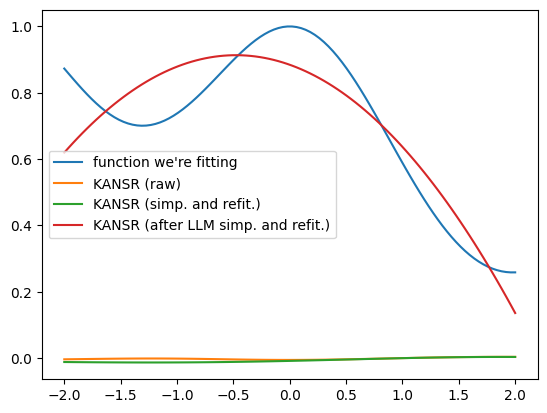

###############################
# Final formula for output 0: #
###############################
 -0.1267*x0**2 - 0.1209*x0 + 0.8844 with a chi^2 of 2.667e-02 and from the LLMsimplified fit (of raw/KANsimplified/LLMsimplified)
best expression: -0.1267*x0**2 - 0.1209*x0 + 0.8844, at index 0, with chi^2 0.026668774669485272
initially: 0
refitting all coefficients in KAN: 0.0057*x0**2 + 0.0011*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.9105)**3*exp(-1.3527*x0) - 0.0087*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.9105)**2*exp(-0.9018*x0) + 0.0096 - 0.0179*exp(-0.4509*x0), chi^2 inf
simplifying by LLM and refitting again: -0.1267*x0**2 - 0.1209*x0 + 0.8844, chi^2 0.026668774669485272


In [93]:
# Convert training data to numpy arrays for optimization
x_data = dataset['train_input'].cpu().numpy().flatten()
y_data = dataset['train_label'].cpu().numpy().flatten()

full_expressions = node_data['full_expressions']
# Optimize and simplify the expression
best_expressions, best_chi_squareds, result_dicts = kan_sr.optimize_expression(
    client, full_expressions, 'gpt-4o', x_data, y_data, 
    custom_system_prompt=None, original_f = f, prune_small_terms=True
)
result_dict = result_dicts[0]

# Print the results
best_index = result_dict['best_expression_index']
print(f"best expression: {result_dict['best_expression']}, at index {best_index}, with chi^2 {result_dict['best_chi_squared']}")
print(f"initially: {result_dict['raw_expression'][best_index]}")
print(f"refitting all coefficients in KAN: {result_dict['final_KAN_expression'][best_index]}, chi^2 {result_dict['chi_squared_KAN_final'][best_index]}")
print(f"simplifying by LLM and refitting again: {result_dict['final_LLM_expression'][best_index]}, chi^2 {result_dict['chi_squared_LLM_final'][best_index]}")

HI -0.1267*x0**2 - 0.1209*x0 + 0.8844 -0.1267*x0**2 - 0.1209*x0 + 0.8844
HI 0.0057*x0**2 + 0.0011*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.9105)**3*exp(-1.3527*x0) - 0.0087*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.9105)**2*exp(-0.9018*x0) + 0.0096 - 0.0179*exp(-0.4509*x0) 0.0057*x0**2 + 0.0011*(0.291*x0**2*numpy.exp(0.4509*x0) + numpy.exp(0.4509*x0) - 0.9105)**3*numpy.exp(-1.3527*x0) - 0.0087*(0.291*x0**2*numpy.exp(0.4509*x0) + numpy.exp(0.4509*x0) - 0.9105)**2*numpy.exp(-0.9018*x0) + 0.0096 - 0.0179*numpy.exp(-0.4509*x0)
plotting raw expression
HI 0.0057*x0**2 + 0.0011*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.9105)**3*exp(-1.3527*x0) - 0.0087*(0.291*x0**2*exp(0.4509*x0) + exp(0.4509*x0) - 0.9105)**2*exp(-0.9018*x0) + 0.0096 - 0.0179*exp(-0.4509*x0) 0.0057*x0**2 + 0.0011*(0.291*x0**2*numpy.exp(0.4509*x0) + numpy.exp(0.4509*x0) - 0.9105)**3*numpy.exp(-1.3527*x0) - 0.0087*(0.291*x0**2*numpy.exp(0.4509*x0) + numpy.exp(0.4509*x0) - 0.9105)**2*numpy.exp(-0.9018*x0) +

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

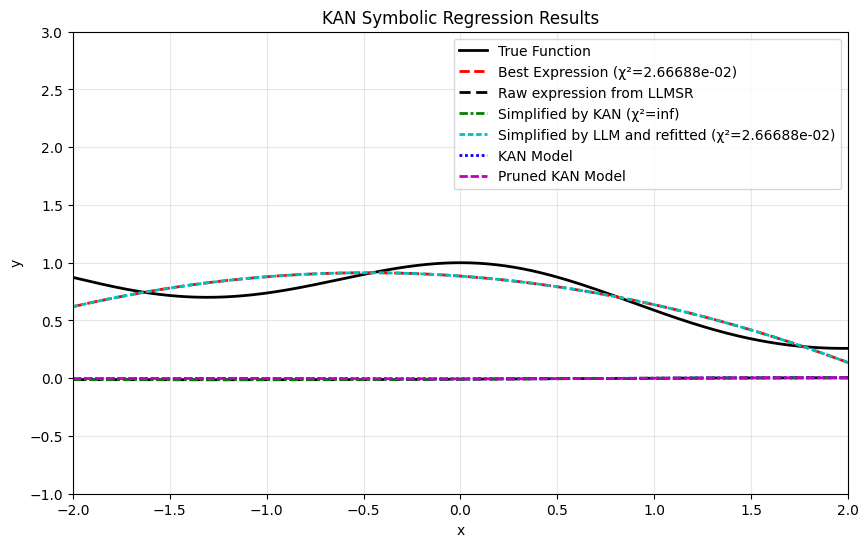

In [94]:
kan_sr.plot_results(f,x_range,result_dict,model=model,pruned_model=pruned_model,plotmaxmin = [[-2,2],[-1,3]])

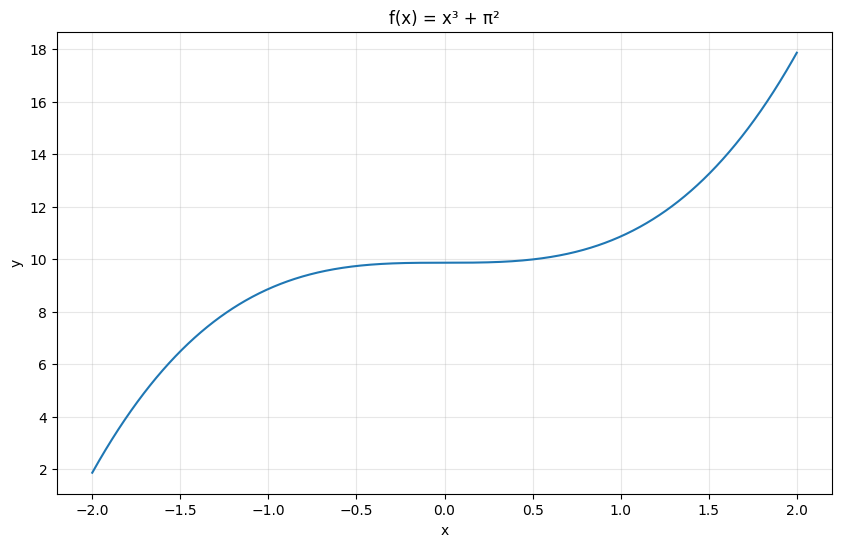

In [ ]:
#Plot the function
ftest = lambda x: (x**2 + torch.pi)**2
x_range = (-2,2)
x = np.linspace(x_range[0], x_range[1], 1000)
y = target_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"f(x) = x³ + π²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.76e-03 | test_loss: 4.70e-03 | reg: 3.11e+01 | : 100%|█| 500/500 [04:19<00:00,  1.93


saving model version 0.1
saving model version 0.2
Trained model:
Pruned model:


2025-03-11 20:21:30,310 - LLMSR.llm - INFO - API key usage check successful. Current usage: 33.598697146
2025-03-11 20:21:30,312 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-11 20:21:30,313 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


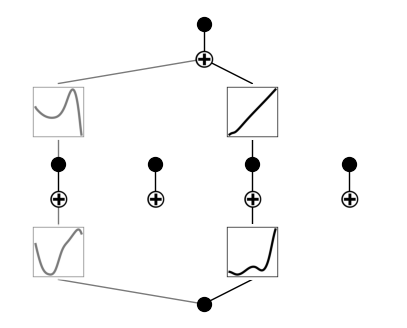

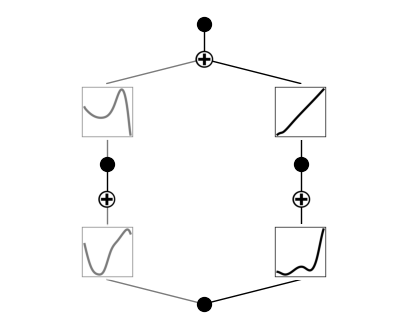

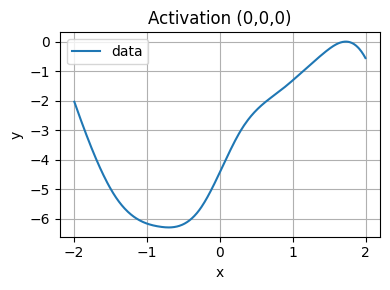

2025-03-11 20:21:30,662 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-11 20:21:30,662 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 0.4375298940380389, for constant: [-3.38181725]
2025-03-11 20:21:30,662 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 20:21:34,150 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 20:21:34,152 - LLMSR.llmSR - INFO - Initial population best: score=-0.08179162673006521, params=[ 2.67575923  1.39825308  0.83433516 -4.48474362], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3]...
2025-03-11 20:21:34,153 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 20:21:37,588 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.08179162673006521, params=[ 2.67575923  1.39825308  0.83433516 -4.48474362], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3]...
20


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 30 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
No errors
Approximation for (0,0,0): params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3], with parameters [ 2.676  1.398  0.834 -4.485]


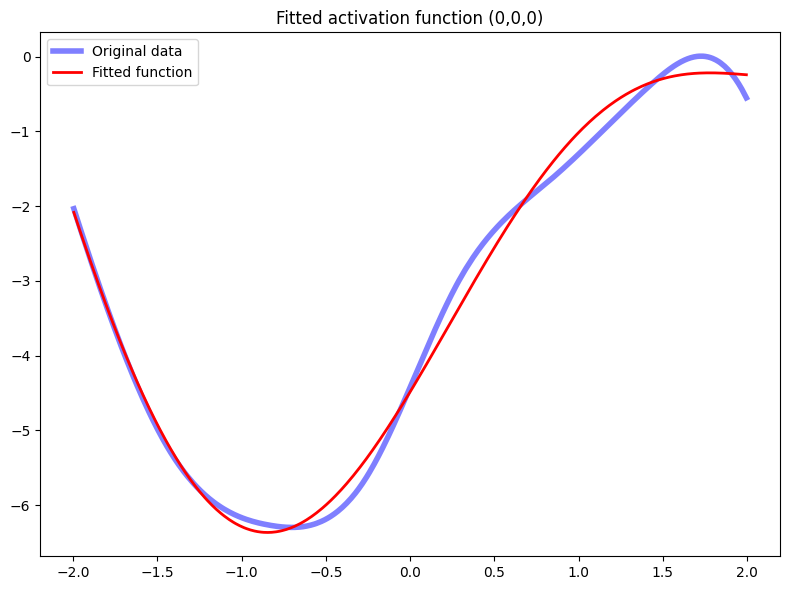

2025-03-11 20:21:43,049 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,1)


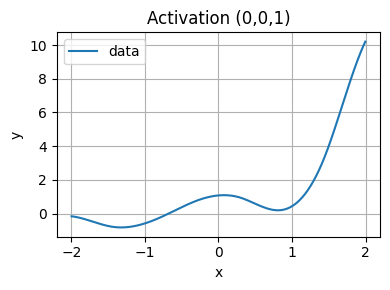

2025-03-11 20:21:43,115 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-11 20:21:43,115 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 4.203933761051371, for constant: [1.18683507]
2025-03-11 20:21:43,116 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 20:21:45,897 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 20:21:45,897 - LLMSR.llmSR - INFO - Initial population best: score=-45.92460402092999, params=[-35.85453083   0.63067194  -0.73884496  22.56231756   1.25042242], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**3 + params[3] * x + params[4]...
2025-03-11 20:21:45,898 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 20:22:05,031 - LLMSR.llmSR - INFO - Generation 1 best: score=-37.572764305959296, params=[ 1.22143566  2.59286746  1.16546254  1.64328985 -0.12784525], ansatz: params[0] * np.cos(params[1] *


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 30 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
No errors
Approximation for (0,0,1): params[0] * np.cos(params[1] * x) + params[2] * x**2 + params[3] * x + params[4], with parameters [ 1.221  2.593  1.165  1.643 -0.128]


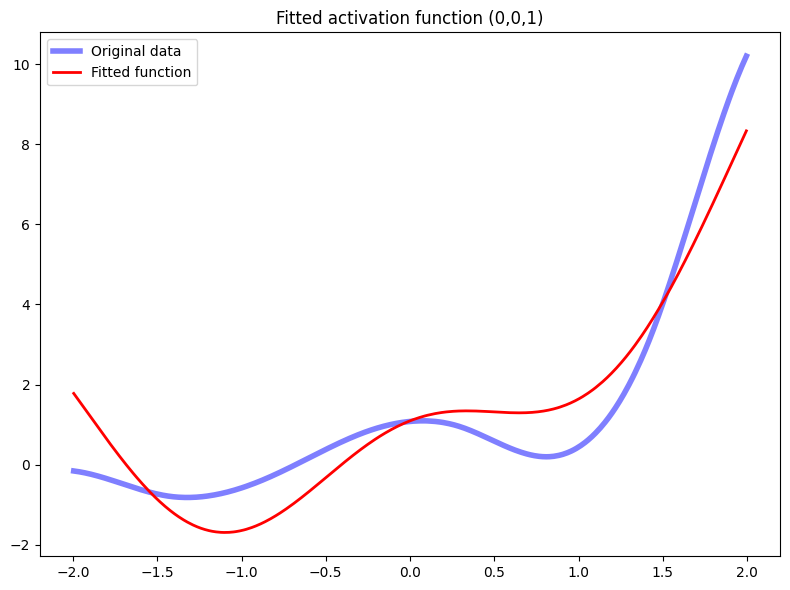

2025-03-11 20:22:09,805 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


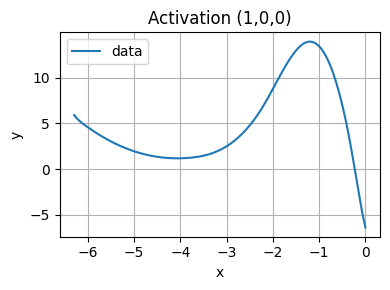

2025-03-11 20:22:09,871 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-11 20:22:09,872 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 1.0903847666947222, for constant: [4.3017839]
2025-03-11 20:22:09,872 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 20:22:15,478 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 20:22:15,479 - LLMSR.llmSR - INFO - Initial population best: score=-1.3993931517560898, params=[ 1.11132939 -2.23183031 -0.31363211 -2.01819547  2.36870009], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...
2025-03-11 20:22:15,480 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 20:22:25,256 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.07827427649899386, params=[-12.04881878   1.08875289  -2.00318207  -1.48032483 -15.99523326
 -44.83367787 -18.01115552], ansatz: p


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 30 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
No errors
Approximation for (1,0,0): params[0] * np.sin(params[1] * x + params[2]) + params[3] * x**3 + params[4] * x**2 + params[5] * x + params[6], with parameters [-12.049   1.089  -2.003  -1.48  -15.995 -44.834 -18.011]


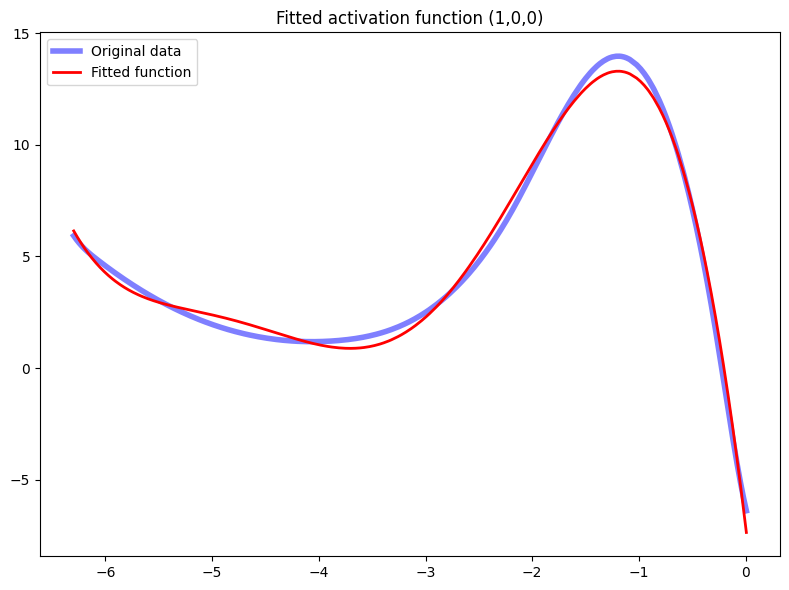

2025-03-11 20:22:32,000 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,1,0)


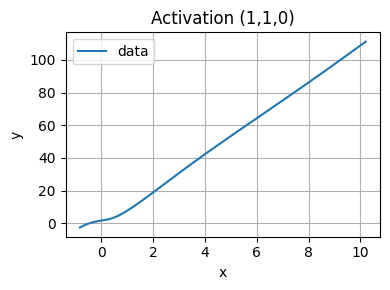

2025-03-11 20:22:32,194 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-11 20:22:32,195 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 3.5164737943238404, for constant: [13.46334374]
2025-03-11 20:22:32,195 - LLMSR.llmSR - INFO - Generating initial population asynchronously
<string>:1: RuntimeWarning: invalid value encountered in log
/Users/kit/Documents/Phys_Working/LLM_SR/Examples/../LLMSR/fit.py:92: OptimizeWarning: Covariance of the parameters could not be estimated
  params_opt, covariance = curve_fit(curve, x, y, p0=random_params, maxfev=1000*largest_entry)
2025-03-11 20:22:35,025 - LLMSR.llmSR - WARNING - Function returns NaN or inf values
2025-03-11 20:22:35,923 - LLMSR.llmSR - WARNING - Function returns NaN or inf values
2025-03-11 20:22:35,925 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 20:22:35,926 - LLMSR.llmSR - WARNING - Found non-finite score nan, setting to -1123.6529743783353
2025-03-11 2


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 30 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
No errors
Approximation for (1,1,0): params[0] * x**2 + params[1] * x, with parameters [0.298 8.357]


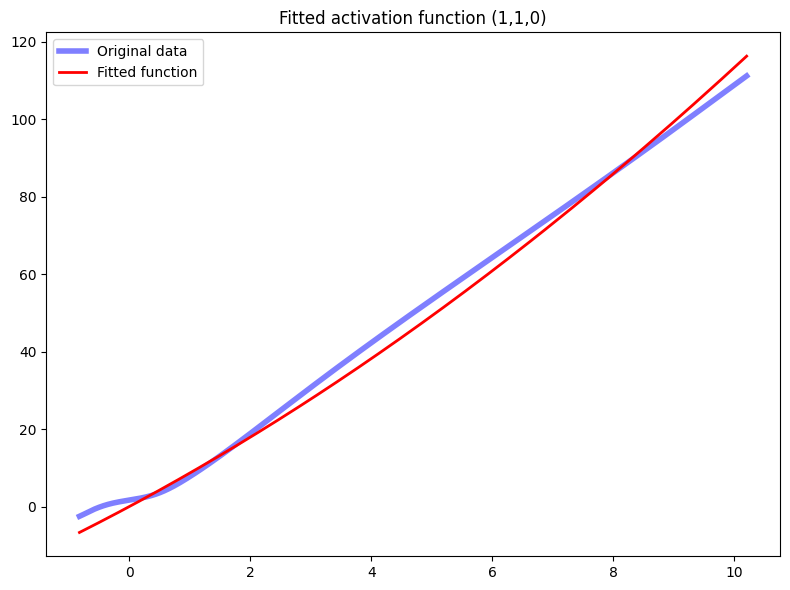

2025-03-11 20:23:06,123 - LLMSR.llmSR - INFO - KAN conversion complete: 4 total connections
2025-03-11 20:23:06,124 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed
2025-03-11 20:23:07,273 - LLMSR.llm - INFO - API key usage check successful. Current usage: 33.793372146
2025-03-11 20:23:07,274 - LLMSR.llmSR - INFO - API key usage whilst this was running: $0.19


Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3]
Parameters are [ 2.7  1.4  0.8 -4.5]
Approximation for (0, 0, 1): params[0] * np.cos(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]
Parameters are [ 1.2  2.6  1.2  1.6 -0.1]
Approximation for (1, 0, 0): params[0] * np.sin(params[1] * x + params[2]) + params[3] * x**3 + params[4] * x**2 + params[5] * x + params[6]
Parameters are [-12.    1.1  -2.   -1.5 -16.  -44.8 -18. ]
Approximation for (1, 1, 0): params[0] * x**2 + params[1] * x
Parameters are [0.3 8.4]
KAN Connection: (0, 0, 0), Best Expression: 2.6758 * np.sin(1.3983 * x ) + 0.8343 * x**2 + -4.4847, Score: -0.08179
KAN Connection: (0, 0, 1), Best Expression: 1.2214 * np.cos(2.5929 * x ) + 1.1655 * x**2 + 1.6433 * x + -0.1278, Score: -37.57276
KAN Connection: (1, 0, 0), Best Expression: -12.0488 * np.sin(1.0888 * x + -2.0032) + -1.4803 * x**3 + -15.9952 * x**2 + -44.8337 * x + -18.0112, Score: -0.07827
KAN Connection: (1, 1,

2025-03-11 20:23:11,643 - LLMSR.fit - INFO - Fitting curve with initial parameters [-27.6646, 181.9865, 133.5211, 10.2074, 13.7332, 12.0488, 119.966, 321.704, 0.9084, 0.5967, 0.8039, 1.3983, 2.5929, 0.7092, 6.8861, 2.9134, 0.7433, 0.0778, 0.186, 1.0]


KAN expression (simplified):
 -27.6646*x0**2 + 13.7332*x0 - 133.5211*(0.186*x0**2 + 0.5967*sin(1.3983*x0) - 1.0)**3 - 321.704*(0.186*x0**2 + 0.5967*sin(1.3983*x0) - 1.0)**2 + 0.8039*(0.7092*x0**2 + x0 + 0.7433*cos(2.5929*x0) - 0.0778)**2 - 119.966*sin(1.3983*x0) - 12.0488*sin(0.9084*x0**2 + 2.9134*sin(1.3983*x0) - 6.8861) + 10.2074*cos(2.5929*x0) + 181.9865
Converted to numpy, and replaced the new floats with 'params':  params[0]*x0**2 + params[4]*x0 - params[2]*(params[18]*x0**2 + params[9]*np.sin(params[11]*x0) - params[19])**3 - params[7]*(params[18]*x0**2 + params[9]*np.sin(params[11]*x0) - params[19])**2 + params[10]*(params[13]*x0**2 + x0 + params[16]*np.cos(params[12]*x0) - params[17])**2 - params[6]*np.sin(params[11]*x0) - params[5]*np.sin(params[8]*x0**2 + params[15]*np.sin(params[11]*x0) - params[14]) + params[3]*np.cos(params[12]*x0) + params[1]


2025-03-11 20:23:28,723 - LLMSR.fit - INFO - Fitting curve with method lm
2025-03-11 20:23:45,138 - LLMSR.fit - INFO - Fitting curve with method trf
2025-03-11 20:29:57,448 - LLMSR.fit - INFO - Fitting curve with method dogbox
2025-03-11 20:30:07,196 - LLMSR.fit - INFO - Fit complete: chi-squared=633.8591812812197


Refitting: params[0]*x0**2 + params[4]*x0 - params[2]*(params[18]*x0**2 + params[9]*np.sin(params[11]*x0) - params[19])**3 - params[7]*(params[18]*x0**2 + params[9]*np.sin(params[11]*x0) - params[19])**2 + params[10]*(params[13]*x0**2 + x0 + params[16]*np.cos(params[12]*x0) - params[17])**2 - params[6]*np.sin(params[11]*x0) - params[5]*np.sin(params[8]*x0**2 + params[15]*np.sin(params[11]*x0) - params[14]) + params[3]*np.cos(params[12]*x0) + params[1] - so after simplification and refitting gave a chi^2 of 6.3386e+02
simplifying -11.6849*x0**2 + 21.6143*x0 - 93.8867*(0.1750*x0**2 + 0.5842*sp.sin(1.4833*x0) - 0.8591)**3 - 197.9363*(0.1750*x0**2 + 0.5842*sp.sin(1.4833*x0) - 0.8591)**2 + 0.0000*(1218.4409*x0**2 + x0 + 796.5935*sp.cos(2.6472*x0) - -0.0215)**2 - 73.2420*sp.sin(1.4833*x0) - 11.5625*sp.sin(0.9417*x0**2 + 2.9063*sp.sin(1.4833*x0) - 6.8697) + 6.4845*sp.cos(2.6472*x0) + 86.7221 with {'x0': x0, 'x1': x1, 'sin': sin, 'cos': cos, 'sp': <module 'sympy' from '/Users/kit/Documents/Phy

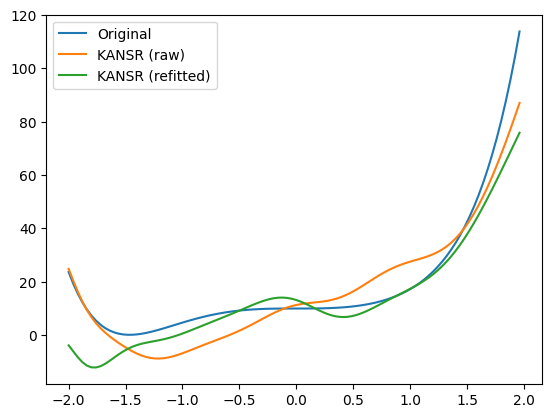

###############################
# Final formula for output 0: #
###############################
 -11.6849*x0**2 + 21.6143*x0 - 59.5299107622183*(0.203701548131766*x0**2 + 0.680013968106158*sin(1.4833*x0) - 1.0)**3 - 146.087442416003*(0.203701548131766*x0**2 + 0.680013968106158*sin(1.4833*x0) - 1.0)**2 - 73.242*sin(1.4833*x0) - 11.5625*sin(0.9417*x0**2 + 2.9063*sin(1.4833*x0) - 6.8697) + 6.4845*cos(2.6472*x0) + 86.7221 with a chi^2 of 6.339e+02 and from the KANsimplified fit (of raw/KANsimplified/LLMsimplified)
best expression: -11.6849*x0**2 + 21.6143*x0 - 59.5299107622183*(0.203701548131766*x0**2 + 0.680013968106158*sin(1.4833*x0) - 1.0)**3 - 146.087442416003*(0.203701548131766*x0**2 + 0.680013968106158*sin(1.4833*x0) - 1.0)**2 - 73.242*sin(1.4833*x0) - 11.5625*sin(0.9417*x0**2 + 2.9063*sin(1.4833*x0) - 6.8697) + 6.4845*cos(2.6472*x0) + 86.7221, at index 0, with chi^2 633.8591812812197
initially: -
refitting all coefficients in KAN: -11.6849*x0**2 + 21.6143*x0 - 59.5299107622183*(0.20

In [ ]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, ftest,
    ranges=x_range,
    width=[1, 4, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    seed=17,
    train_steps=1000,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=system_prompt_for_second_simplification,
    generations = 3,
    population=10,
    plot_parents=True,
    demonstrate_parent_plotting=True
)


# Print the final expressions
print(f"Raw expression: {results['result_dict']['raw_expression']}")
print(f"best expression: {results['result_dict']['best_expression']}, at index {results['result_dict']['best_expression_index']}, with chi^2 {results['result_dict']['best_chi_squared']}")


Error plotting simplified expression: 'NoneType' object has no attribute 'replace'


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

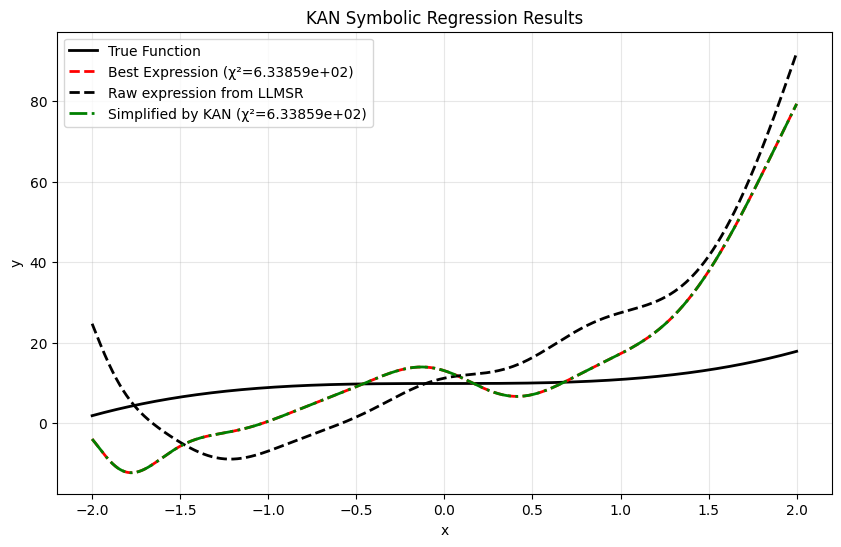

In [5]:

kan_sr.plot_results(f, x_range, results['result_dict'], title="KAN Symbolic Regression Results")

In [ ]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f2,
    ranges=x_range2,
    width=[1, 6, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=40,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=system_prompt_for_second_simplification,
    generations = 3,
    population=10
)

# Print the final expressions
print(f"Raw expression: {results['result']['raw_expression']}")
print(f"SymPy simplified: {results['result']['simplified_expression']}")
print(f"LLM simplified: {results['result']['llm_simplified']}")
print(f"Chi-squared: {results['result']['chi_squared']}")

In [ ]:
# dataset = kan_sr.create_dataset(f, n_var=1, ranges=x_range, train_num=10000, test_num=1000, device="cpu")
# x_data = dataset['train_input'].cpu().numpy().flatten()
# y_data = dataset['train_label'].cpu().numpy().flatten()

# out = kan_sr.optimize_expression(
#     client, results['result_dict']['raw_expression'], 'openai/gpt-4o', x_data, y_data, 
#     custom_system_prompt=None, original_f = f, prune_small_terms=True
# )


#out = optimize_expression(client, full_expressions, 'gpt_model', x_data, y_data, custom_system_prompt=None, original_f = None, prune_small_terms =True ):

In [22]:
from importlib import reload
reload(kan_sr)

<module 'LLMSR.kan_sr' from '/Users/kit/Documents/Phys_Working/LLM_SR/Examples/../LLMSR/kan_sr.py'>

In [24]:
results['result_dict']

{'raw_expression': '-27.6646*x0**2 + 13.7332*x0 - 133.5211*(0.186*x0**2 + 0.5967*sin(1.3983*x0) - 1.0)**3 - 321.704*(0.186*x0**2 + 0.5967*sin(1.3983*x0) - 1.0)**2 + 0.8039*(0.7092*x0**2 + x0 + 0.7433*cos(2.5929*x0) - 0.0778)**2 - 119.966*sin(1.3983*x0) - 12.0488*sin(0.9084*x0**2 + 2.9134*sin(1.3983*x0) - 6.8861) + 10.2074*cos(2.5929*x0) + 181.9865',
 'final_KAN_expression': ['-11.6849*x0**2 + 21.6143*x0 - 59.5299107622183*(0.203701548131766*x0**2 + 0.680013968106158*sin(1.4833*x0) - 1.0)**3 - 146.087442416003*(0.203701548131766*x0**2 + 0.680013968106158*sin(1.4833*x0) - 1.0)**2 - 73.242*sin(1.4833*x0) - 11.5625*sin(0.9417*x0**2 + 2.9063*sin(1.4833*x0) - 6.8697) + 6.4845*cos(2.6472*x0) + 86.7221'],
 'chi_squared_KAN_final': [np.float64(633.8591812812197)],
 'final_LLM_expression': [None],
 'chi_squared_LLM_final': [None],
 'best_expression': '-11.6849*x0**2 + 21.6143*x0 - 59.5299107622183*(0.203701548131766*x0**2 + 0.680013968106158*sin(1.4833*x0) - 1.0)**3 - 146.087442416003*(0.2037015

plotting raw expression
plotting simplified by KAN expression
Error plotting simplified expression: 'NoneType' object has no attribute 'replace'


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

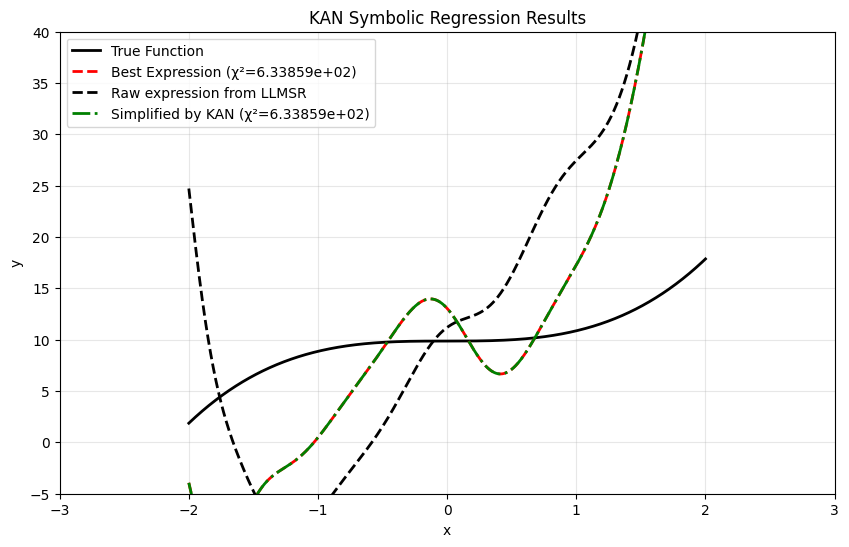

In [23]:
kan_sr.plot_results(f, x_range, results['result_dict'], title="KAN Symbolic Regression Results", plotmaxmin = [[-3,3],[-5,40]])

In [ ]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f,
    ranges=x_range,
    width=[1, 4, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=500,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=None,
    generations = 3,
    population=10,
    plot_parents=False,
    demonstrate_parent_plotting=False
)

# Print the final expressions
print(f"Raw expression: {results['result_dict']['raw_expression']}")
print(f"best expression: {results['result_dict']['best_expression']}, at index {results['result_dict']['best_expression_index']}, with chi^2 {results['result_dict']['best_chi_squared']}")

In [ ]:
kan_sr.plot_results(f, x_range, results['result_dict'], title="KAN Symbolic Regression Results")

## Optimize and simplify the expression

Now we'll optimize the parameters of the expression and use SymPy and the LLM to simplify it.

## Example 2: More Complex Function

Now let's try a more complex function to showcase the power of KAN symbolic regression.

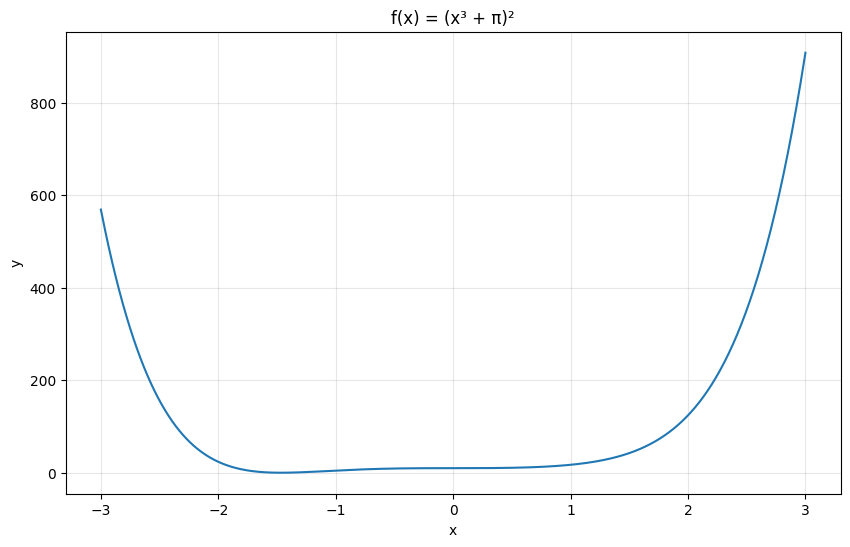

In [229]:
# Define a more complex target function: f(x) = (x³ + π)²
def target_function2(x):
    return (x**3 + np.pi)**2

# Define the function as a PyTorch function
def f2(x):
    return (x**3 + torch.pi)**2

# Plot the function
x_range2 = (-3, 3)
x = np.linspace(x_range2[0], x_range2[1], 1000)
y = target_function2(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"f(x) = (x³ + π)²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f,
    ranges=x_range2,
    width=[1, 6, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=500,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=None,
    generations = 3,
    population=10,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

# Print the final expressions
print(f"Raw expression: {results['result_dict']['raw_expression']}")
print(f"best expression: {results['result_dict']['best_expression']}, at index {results['result_dict']['best_expression_index']}, with chi^2 {results['result_dict']['best_chi_squared']}")
print(f"LLM simplified: {results['result_dict']['final_LLM_expression']}")
print(f"Chi-squared: {results['result_dict']['chi_squared_LLM_final']}")

In [ ]:
kan_sr.plot_results(f, x_range, results['result_dict'], title="KAN Symbolic Regression Results")

## Custom Example

Define a custom function below and run the pipeline.

In [ ]:
# Define your own target function
def custom_target_function(x):
    # Replace this with your own function
    return np.sin(x) * np.exp(-0.1 * x**2)

# Define the function as a PyTorch function
def custom_f(x):
    # Replace this with your own function
    return torch.sin(x) * torch.exp(-0.1 * x**2)

# Choose a suitable x range
custom_x_range = (-5, 5)

# Plot the function
x = np.linspace(custom_x_range[0], custom_x_range[1], 1000)
y = custom_target_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Custom Function: sin(x) * exp(-0.1 * x²)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Run the pipeline on your custom function
custom_results = kan_sr.run_complete_pipeline(
    client, custom_f,
    x_range=custom_x_range,
    width=[1, 8, 1],  # Use a wider network for complex functions
    grid=8,
    k=4,
    train_steps=500,  # More training steps for better results
    gpt_model='openai/gpt-4o',
    node_th=0.1,  
    edge_th=0.1,
    custom_system_prompt= None
)

# Print the final expressions
print(f"Raw expression: {custom_results['result_dict']['raw_expression']}")
print(f"SymPy simplified: {custom_results['result_dict']['simplified_expression']}")
print(f"LLM simplified: {custom_results['result_dict']['llm_simplified']}")
print(f"Chi-squared: {custom_results['result_dict']['chi_squared']}")

In [ ]:
# Plot the results for your custom function
fig, ax = kan_sr.plot_results(
    custom_f, custom_x_range, custom_results['result_dict'], 
    title="KAN Symbolic Regression: Custom Function"
)
plt.show()

## Experiment with Different Parameters

You can experiment with different model parameters to see how they affect the results.

In [ ]:
# Define different model configurations
configs = [
    {
        'name': 'Small Network',
        'width': [1, 4, 1],
        'grid': 5,
        'k': 3,
        'train_steps': 50
    },
    {
        'name': 'Medium Network',
        'width': [1, 8, 1],
        'grid': 7,
        'k': 3,
        'train_steps': 100
    },
    {
        'name': 'Deep Network',
        'width': [1, 4, 4, 1],
        'grid': 6,
        'k': 3,
        'train_steps': 150
    }
]

# Choose one config to run (change the index to try different configs)
config_idx = 0
config = configs[config_idx]

print(f"Running with configuration: {config['name']}")
print(f"Network width: {config['width']}")
print(f"Grid size: {config['grid']}")
print(f"Basis functions: {config['k']}")
print(f"Training steps: {config['train_steps']}")

In [ ]:
# Run the pipeline with the selected configuration
# You can use one of the previous functions or define a new one
experiment_results = kan_sr.run_complete_pipeline(
    client, f,  # Using the first example function
    x_range=x_range,
    width=config['width'],
    grid=config['grid'],
    k=config['k'],
    train_steps=config['train_steps'],
    gpt_model='openai/gpt-4o',
    node_th=0.1,
    edge_th=0.1,
    custom_system_prompt=None
)

# Print the final expressions
print(f"Raw expression: {experiment_results['result_dict']['raw_expression']}")
print(f"SymPy simplified: {experiment_results['result_dict']['simplified_expression']}")
print(f"LLM simplified: {experiment_results['result_dict']['llm_simplified']}")
print(f"Chi-squared: {experiment_results['result_dict']['chi_squared']}")

In [ ]:
# Plot the results
fig, ax = kan_sr.plot_results(
    f, x_range, experiment_results['result_dict'], 
    title=f"KAN Symbolic Regression with {config['name']}"
)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# # initialize KAN with G=3
# model = KAN(width=[1,1,1,1], grid=7, k=3, seed=0, device=device, symbolic_enabled=False)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x))
out_test = LLMSR.kan_sr.run_complete_pipeline(client, f, ranges=[-1,1], width=[1,2,1], grid=7, k=3, train_steps=100, gpt_model="openai/gpt-4o", node_th=0.1, edge_th=0.1, plot_parents=True, generations=3, population=3)